<a href="https://colab.research.google.com/github/kelvynlukito/Internship_PT-XYZ_SentimentAnalysis/blob/main/indoBERT_SentimentAnalysis_ManualUpload_(Customer_Service_Chat)_PT_XYZ.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Sentiment Analysis**

## **Install Depedencies**

In [ ]:
!pip install transformers
!pip install torch
!pip install Sastrawi
!pip install wordcloud
!pip install xformers
!pip install tweepy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 33.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 32.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 102.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 76.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 3.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.1/109.1 MB 9.1 MB/s eta 0:00:00


In [ ]:
!pip install pymysql
!pip install sqlalchemy
!pip install psycopg2
!pip install mysql-connector-python
!pip install psycopg2-binary

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.8/44.8 kB 767.3 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27.5/27.5 MB 38.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 409.8/409.8 kB 38.5 MB/s eta 0:00:00
  Attempting uninstall: protobuf
    Found existing installation: protobuf 3.20.3
    Uninstalling protobuf-3.20.3:
      Successfully uninstalled protobuf-3.20.3
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 21.8 MB/s eta 0:00:00


In [ ]:
!pip install apify_client
!pip install instaloader

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.3/66.3 kB 1.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.4/75.4 kB 7.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 74.5/74.5 kB 9.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 7.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.5/62.5 kB 1.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for instaloader: filename=instaloader-4.10-py3-none-any.whl size=64281 sha256=7fca65c4be9ac473e21411780249e741732414330a61ad0736a9d6cab091843a
  Stored in directory: /root/.cache/pip/wheels/5b/8d/e0/866c1ad8efef4ab789acf51c4b317711d63f62af0228a6a676
Successfully built instaloader


## **Import Libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time

## **Import Data**

In [ ]:
# Read dataset for excel file
def read_dataset_excel(file_path):
  df = pd.read_excel(file_path)
  return df

# Read dataset for csv file
def read_dataset_csv(file_path):
  df = pd.read_csv(file_path, on_bad_lines='skip')
  return df

In [ ]:
def read_dataframe(file_path):
  if file_path.endswith('.csv'):
    df = pd.read_csv(file_path)
  elif file_path.endswith('.xlsx'):
    df = pd.read_excel(file_path)
  else:
    print('Format File is not supported. Please upload a CSV or Excel File.')
    print("\033[1;41;40m Format File is not supported. Please upload a CSV or Excel File. \n")
    df = None
  return df

### **Get Data from Uploaded file**

In [ ]:
from google.colab import files

# function upload file
def upload_file():
  # Upload a single file
  uploaded = files.upload()

  # Access the uploaded file
  for filename, content in uploaded.items():
      with open(filename, 'wb') as f:
          f.write(content)
      print(f"File '{filename}' uploaded successfully!")
  return uploaded


import os

# function checking file format
def check_file_format(file_name):
  new_file_path = ''
  if file_name.endswith('.csv'):
    # Define the current and new file paths
    current_file_path = f'/content/{file_name}'  # Replace with your current file path
    new_file_path = "/content/dataset.csv"  # Replace with your new file path

    # Rename the file
    os.rename(current_file_path, new_file_path)
    print("File has been check & renamed successfully.")

  elif file_name.endswith('.xlsx'):
    # Define the current and new file paths
    current_file_path = f'/content/{file_name}'  # Replace with your current file path
    new_file_path = "/content/dataset.xlsx"  # Replace with your new file path

    # Rename the file
    os.rename(current_file_path, new_file_path)
    print("File has been check & renamed successfully.")
    print("\033[1;32;40m File has been check & renamed successfully. \n")

  else:
    print("\033[1;41;40m Please Upload File with .csv or .xlsx Format \n")

  return new_file_path

### **Get Data from Spreedsheet or Google Drive**

In [ ]:
from google.colab import auth
auth.authenticate_user()

import gspread
from google.auth import default
from gspread.exceptions import SpreadsheetNotFound

def get_data_gdrive():
    creds, _ = default()

    try:
        gc = gspread.authorize(creds)
    except gspread.exceptions.APIError as e:
        error_message = str(e)
        if "401" in error_message and "Invalid Credentials" in error_message:
            raise Exception("Authentication failed. Make sure you have the correct credentials.") from e
        else:
            raise Exception("An error occurred while accessing the spreadsheet.") from e

    data_url = str(input("Spreadsheet Name: "))

    try:
        worksheet = gc.open(data_url).sheet1
    except SpreadsheetNotFound as e:
        raise Exception(f"The spreadsheet '{data_url}' was not found in your Google Drive.") from e

    # get_all_values gives a list of rows.
    rows = worksheet.get_all_values()
    print(rows)

    # Convert to a DataFrame and render.
    import pandas as pd
    df = pd.DataFrame.from_records(rows[1:], columns=rows[0])
    print("Data has been input successfully")
    print("\033[1;32;40m Data has been input successfully \n")
    return df

### **Get Data from Google BigQuery**

In [ ]:
# libraries
"""
from google.colab import auth
from google.cloud import bigquery
from google.colab import data_table

def get_data_bigquery():
  project = '' # Project ID insert based on the query result selected to explore
  location = '' # Location insert based on the query result selected to explore

  try:
    client = bigquery.Client(project=project, location=location)
    data_table.enable_dataframe_formatter()
    auth.authenticate_user()
  except EnvironmentError as e:
    raise Exception("Authentication failed. Make sure you have the correct credentials.") from e

  job = client.get_job('') # Job ID based on the query result selected to explore
  result = job.to_dataframe()
  return result
"""

'\nfrom google.colab import auth\nfrom google.cloud import bigquery\nfrom google.colab import data_table\n\ndef get_data_bigquery():\n  project = \'\' # Project ID insert based on the query result selected to explore\n  location = \'\' # Location insert based on the query result selected to explore\n\n  try:\n    client = bigquery.Client(project=project, location=location)\n    data_table.enable_dataframe_formatter()\n    auth.authenticate_user()\n  except EnvironmentError as e:\n    raise Exception("Authentication failed. Make sure you have the correct credentials.") from e\n\n  job = client.get_job(\'\') # Job ID based on the query result selected to explore\n  result = job.to_dataframe()\n  return result\n'

### **Get Data from MySQL**

In [ ]:
import pymysql
from sqlalchemy import create_engine
import pandas as pd

def get_data_mysql():
    # Replace the following with your MySQL credentials
    DB_HOST = 'your_database_host'
    DB_USER = 'your_database_user'
    DB_PASSWORD = 'your_database_password'
    DB_NAME = 'your_database_name'
    TABLE_NAME = 'your_table_name'

    try:
        # Establish a connection to the MySQL server
        connection = pymysql.connect(host=DB_HOST, user=DB_USER, password=DB_PASSWORD, database=DB_NAME)

        # Create a pandas DataFrame by querying the MySQL table
        query = f"SELECT * FROM {TABLE_NAME};"
        df = pd.read_sql_query(query, connection)

        # Close the connection to the database
        connection.close()

        return df

    except Exception as e:
        print(f"Error: {e}")
        print(f"\033[1;41;40m Error: {e} \n")
        return None

### **Get Data from PostgreSQL**

In [ ]:
def get_data_postgresql():
    # Replace the following with your PostgreSQL credentials
    DB_HOST = 'your_database_host'
    DB_USER = 'your_database_user'
    DB_PASSWORD = 'your_database_password'
    DB_NAME = 'your_database_name'
    TABLE_NAME = 'your_table_name'

    try:
        # Establish a connection to the PostgreSQL server
        engine = create_engine(f'postgresql://{DB_USER}:{DB_PASSWORD}@{DB_HOST}/{DB_NAME}')

        # Create a pandas DataFrame by querying the PostgreSQL table
        query = f"SELECT * FROM {TABLE_NAME};"
        df = pd.read_sql_query(query, engine)

        return df

    except Exception as e:
        print(f"Error: {e}")
        print(f"\033[1;41;40m Error: {e} \n")
        return None

### **Get Data from Twitter**

In [ ]:
import tweepy
import pandas as pd

def get_data_twitter(start_date, end_date):

    # Set your Twitter API credentials
    API_KEY = str(input('API KEY                                : '))
    API_SECRET_KEY = str(input('API SECRET KEY                  : '))
    ACCESS_TOKEN = str(input('YOUR_ACCESS_TOKEN                 : '))
    ACCESS_TOKEN_SECRET = str(input('YOUR_ACCESS_TOKEN_SECRET   : '))

    # Authenticate with Twitter API
    auth = tweepy.OAuthHandler(API_KEY, API_SECRET_KEY)
    auth.set_access_token(ACCESS_TOKEN, ACCESS_TOKEN_SECRET)
    api = tweepy.API(auth, wait_on_rate_limit=True)

    # Define the search keyword, the number of tweets to retrieve, and the time range
    search_keyword = str(input('Input Keyword  : '))
    num_tweets = 10000

    # Crawl Twitter data within the specified time range
    tweets = []
    for tweet in tweepy.Cursor(api.search, q=search_keyword, lang='en', tweet_mode='extended').items(num_tweets):
        if start_date <= tweet.created_at <= end_date:
            tweets.append({
                'username': tweet.user.screen_name,
                'text': tweet.full_text,
                'created_at': tweet.created_at,
                'retweets': tweet.retweet_count,
                'favorites': tweet.favorite_count,
            })

    # Create a DataFrame from the crawled data
    df = pd.DataFrame(tweets)

    # Return the DataFrame
    return df

### **Get Data from instagram**

In [ ]:
import pandas as pd
from apify_client import ApifyClient
import requests
"""
API_URL_INPUT = 'https://api.apify.com/v2/actor-tasks/kelvynlukito~instagram-comment-scraper-task/input?token=apify_api_aUu4Be8kXKQeGZCsslZGSehVvcvSBC1kFBZR'

response = requests.get(API_URL_INPUT)

if response.status_code == 200:
    data = response.json()
    print("API response data:")
    print(data['directUrls'])
else:
    print(f"Failed to fetch data. Status code: {response.status_code}")

post_urls = data['directUrls']

def get_data_instagram():

    # Initialize the ApifyClient with your API token
    client = ApifyClient("apify_api_aUu4Be8kXKQeGZCsslZGSehVvcvSBC1kFBZR")

    # Prepare the Actor input
    run_input = {
        "directUrls": post_urls,
        "resultsLimit": 5000,
    }

    # Run the Actor and wait for it to finish
    run = client.actor("CAfd43QPcXvyLckpK/SbK00X0JYCPblD2wp").call(run_input=run_input)

    # Fetch and print Actor results from the run's dataset (if there are any)
    for item in client.dataset(run["defaultDatasetId"]).iterate_items():
        print(item)
"""

'\nAPI_URL_INPUT = \'https://api.apify.com/v2/actor-tasks/kelvynlukito~instagram-comment-scraper-task/input?token=apify_api_aUu4Be8kXKQeGZCsslZGSehVvcvSBC1kFBZR\'\n\nresponse = requests.get(API_URL_INPUT)\n\nif response.status_code == 200:\n    data = response.json()\n    print("API response data:")\n    print(data[\'directUrls\'])\nelse:\n    print(f"Failed to fetch data. Status code: {response.status_code}")\n\npost_urls = data[\'directUrls\']\n\ndef get_data_instagram():\n\n    # Initialize the ApifyClient with your API token\n    client = ApifyClient("apify_api_aUu4Be8kXKQeGZCsslZGSehVvcvSBC1kFBZR")\n\n    # Prepare the Actor input\n    run_input = {\n        "directUrls": post_urls,\n        "resultsLimit": 5000,\n    }\n\n    # Run the Actor and wait for it to finish\n    run = client.actor("CAfd43QPcXvyLckpK/SbK00X0JYCPblD2wp").call(run_input=run_input)\n\n    # Fetch and print Actor results from the run\'s dataset (if there are any)\n    for item in client.dataset(run["defaultD

In [ ]:
def choose_data_source():
    print("="*40)
    print("Choose Data Source")
    print("1. Upload File to Collab")
    print("2. Get from Google Drive")
    print("3. Get from Qontak API")
    print("4. Get from Google Big Query")
    print("5. Get from mySQL")
    print("6. Get from PostgreSQL")
    print("7. Get from Twitter API")
    print("8. Get from Instagram API")
    num = int(input("Choose Data Source [1/2/3/4/5/6/7/8] : "))
    print("="*40)
    df = ""
    service_code = [1,2,3,4,5,6,7,8]
    while num not in service_code:
      print("Please select the data source service code that available")
      num = int(input("Choose Data Source [1/2/3/4/5/6/7/8] : "))
    if num == 1:
      # upload file
      file = upload_file()
      print(file)

      # get file name
      file_name = list(file.keys())[0]

      # get new file path
      file_path = check_file_format(file_name)

      # return data source
      df = read_dataframe(file_path)

    elif num == 2:
      # call get_data_gdrive
      df = get_data_gdrive()

    elif num == 3:
      print('Feature release soon')
      """
      # call get_data_qontakAPI()
      df = get_data_qontakAPI()
      """

    elif num == 4:
      print('Feature release soon')
      """
      # call get_data_bigquery()
      df = get_data_bigquery()
      """

    elif num == 5:
      # call get_data_mysql
      df = get_data_mysql()

    elif num == 6:
      # call get_data_postgresql()
      df = get_data_postgresql()

    elif num == 7:
      # Example usage
      date_1 = str(input('Start Date [YYYY-MM-DD] : '))
      date_2 = str(input('End Date [YYYY-MM-DD]   : '))

      start_date = pd.to_datetime(date_1)
      end_date = pd.to_datetime(date_2)

      # call get_data_twitter()
      """
      df = get_data_twitter(start_date, end_date)
      """
      print("Feature Release Soon")

    elif num == 8:
      # call get_data_instagram()
      """
      df = get_data_instagram()
      """
      print("Feature Release Soon")
    return df

## **Import Data to MySQL**

In [ ]:
import pandas as pd
import mysql.connector
from datetime import datetime

# get connection to mysql
def connect_mysql(host, username, password, database):
  try:
    connection = mysql.connector.connect(
    host=host,
    user=username,
    password=password,
    database=database
    )
    print("Connected to MySQL database successfully.")
    print("\033[1;32;40m Connected to MySQL database successfully. \n")
    return connection
  except mysql.connector.Error as err:
    raise Exception(f"An error occurred while connecting to MySQL database: {err}") from err

# post data to mysql table
def post_data_mysql(dataframe, connection, table_name):
    try:
        cursor = connection.cursor()

        # Create the table if it doesn't exist
        create_table_query = f"CREATE TABLE IF NOT EXISTS {table_name} ("
        create_table_query += "id INT AUTO_INCREMENT PRIMARY KEY, "  # Add the 'id' column

        # Mapping Pandas DataFrame dtypes to MySQL data types
        dtype_mapping = {
            'int64': 'INT',
            'float64': 'FLOAT',
            'object': 'LONGTEXT',
        }

        for col_name, col_type in zip(dataframe.columns, dataframe.dtypes):
            mysql_data_type = dtype_mapping.get(str(col_type), 'LONGTEXT')
            create_table_query += f"{col_name} {mysql_data_type}, "

        # Add 'created_at' column with TIMESTAMP data type and default value as CURRENT_TIMESTAMP
        create_table_query += "created_at TIMESTAMP DEFAULT CURRENT_TIMESTAMP"

        create_table_query = create_table_query.rstrip(", ") + ")"
        cursor.execute(create_table_query)

        # Insert data into the table, excluding the 'create_at' column
        insert_query = f"INSERT INTO {table_name} ({', '.join(dataframe.columns)}) VALUES ({', '.join(['%s' for _ in dataframe.columns])})"
        data_to_insert = [tuple(row) for row in dataframe.values]
        cursor.executemany(insert_query, data_to_insert)

        connection.commit()
        print("DataFrame has been successfully saved to MySQL.")
        print("\033[1;32;40m DataFrame has been successfully saved to MySQL. \n")
    except mysql.connector.Error as err:
        connection.rollback()
        raise Exception(f"An error occurred while saving the DataFrame to MySQL: {err}") from err

## **Get Data from MySQL**

In [ ]:
import pymysql
from sqlalchemy import create_engine
import pandas as pd

def get_data_mysql():
    # Replace the following with your MySQL credentials
    DB_HOST = 'db4free.net'
    DB_USER = 'smbtelkom'
    DB_PASSWORD = 'smbtelkom'
    DB_NAME = 'smbtelkom'
    TABLE_NAME = 'chatlog'

    try:
        # Establish a connection to the MySQL server
        connection = pymysql.connect(host=DB_HOST, user=DB_USER, password=DB_PASSWORD, database=DB_NAME)

        # Create a pandas DataFrame by querying the MySQL table
        query = f"SELECT text FROM {TABLE_NAME} WHERE DATE(created_at) = CURDATE()"
        df = pd.read_sql_query(query, connection)

        # Close the connection to the database
        connection.close()

        return df

    except Exception as e:
        print(f"Error: {e}")
        print(f"\033[1;41;40m Error: {e} \n")
        return None

## **Cleaning Text**

In [ ]:
import numpy as np
# Acces content in txt file
file_stopwords = pd.read_csv('https://raw.githubusercontent.com/kelvynlukito/Internship_PADMI_SentimentAnalysis/main/stopwords-id.txt',
                             delimiter='\t',
                             header=None)

# creat custom stopwords based on file content
custom_stopwords = my_array = np.array(file_stopwords.values.flatten())

# Cleaning text custom function
import re
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

# function for remove spesial charater
def lower_text(text):
    # Check if the input is a string
    if isinstance(text, str):
        # Convert to lowercase
        text = text.lower()
    else:
        # If not a string, return an empty string
        text = ''
    print(f"\033[1;32;40m Process text {text} \n")
    return text

# Remove line breaks
def remove_line_breaks(text):
    text = re.sub(r'\n', '', text)
    print(f"\033[1;32;40m Process text {text} \n")

    return text

# fucntion for remove text noise
def remove_text_noise(text):
    # Remove text noise
    text = re.sub(r'(@\[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|^rt|http.+?', '', text)
    print(f"\033[1;32;40m Process text {text} \n")

    return text

# function for remove urls
def remove_urls(text):
    # Remove words starting with "https"
    text = re.sub(r'\bhttps\w*\s*', '', str(text))
    print(f"\033[1;32;40m Process text {text} \n")

    # Remove URLs starting with www.
    text = re.sub(r'www\.\S+', '', str(text))
    print(f"\033[1;32;40m Process text {text} \n")

    return text

# function for remove hashtags
def remove_hashtags(text):
    # Remove hashtags
    text = re.sub(r'#\w+', '', str(text))
    print(f"\033[1;32;40m Process text {text} \n")

    return text

# function for remove tag accounts
def remove_tag_accounts(text):
    # Remove tag accounts starting with '@'
    text = re.sub('@[^\s]+','', str(text))
    text = re.sub('http[^\s]+','', str(text))
    print(f"\033[1;32;40m Process text {text} \n")

    return text

# function for remove emoji
def remove_emoji(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    text = emoji_pattern.sub(r'', str(text))
    print(f"\033[1;32;40m Process text {text} \n")

    return text

# function for remove stopwords
def remove_stopwords(text, custom_stopwords):
    # Check if the input is a string
    if isinstance(text, str):
        # Create Stopword Remover
        factory = StopWordRemoverFactory()
        stopword_remover = factory.create_stop_word_remover()

        # Get default stopwords
        stopwords = ['https', 't', 't.co', 'co', 'yg', 'nggak', 'gak',
                     'min', 'mimin', 'admin', 'kak', 'ka', 'aku', 'ndak',
                     'gak', 'indak', 'ga', 'g', 'y']

        # Add custom stopwords
        stopwords.extend(custom_stopwords)

        # Remove stopwords from text
        words = text.split()
        cleaned_words = [word for word in words if word not in stopwords]
        cleaned_text = ' '.join(cleaned_words)
    else:
        # If not a string, return an empty string
        cleaned_text = ''

    print(f"\033[1;32;40m Process text {cleaned_text} \n")
    return cleaned_text

# function for stemming text
def stem_text(text):
    # Stem words using Sastrawi
    factory = StemmerFactory()
    stemmer = factory.create_stemmer()
    print(f"\033[1;32;40m Process text {stemmer.stem(text)} \n")

    return stemmer.stem(text)

## **Import and Implemented indoBERT**

In [ ]:
import transformers
import concurrent.futures
from transformers import pipeline
from transformers import AutoTokenizer, AutoModelForSequenceClassification

pretrained= "afbudiman/indobert-classification"

# Load pre-trained model and tokenizer
model = AutoModelForSequenceClassification.from_pretrained(pretrained)
tokenizer = AutoTokenizer.from_pretrained(pretrained)

# Define sentiment analysis pipeline
sentiment_analysis = pipeline("sentiment-analysis", model=model, tokenizer=tokenizer)

# Define Label Index
label_index = {'LABEL_0': 'positive', 'LABEL_1': 'neutral', 'LABEL_2': 'negative'}

# Perform sentiment analysis on a DataFrame
# Perform sentiment analysis on a DataFrame
def perform_sentiment_analysis_tweet(df):
    def analyze_sentiment(text):
        result = sentiment_analysis(text)
        sentiment_label = result[0]['label']
        sentiment_score = result[0]['score']
        sentiment_class = label_index[sentiment_label]
        return sentiment_class, sentiment_score

    # Use concurrent.futures for parallel processing
    with concurrent.futures.ThreadPoolExecutor() as executor:
        sentiment_results = list(executor.map(analyze_sentiment, df['text']))

    # Update the DataFrame with sentiment class and score
    df['sentiment_class'], df['sentiment_score'] = zip(*sentiment_results)

    return df

## **Visualize indoBERT Performance**

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def visualize_barplot(df_result_tweet):
      # Count the occurrences of each value in y_pred_SVC
      value_counts = df_result_tweet['sentiment_class'].value_counts()

      # Convert value_counts to a DataFrame
      df_VIZ = pd.DataFrame({'Sentiment': value_counts.index, 'Count': value_counts.values})

      # Create a bar chart
      plt.figure(figsize=(20,6))
      sns.barplot(data=df_VIZ, x='Sentiment', y='Count')
      sns.color_palette('pastel')
      plt.xlabel('Sentiment')
      plt.ylabel('Count')
      plt.title('Sentiment Distribution based indoBERT')
      plt.show()

In [ ]:
def visualize_pieplot(df):
    # Define Plot
    plt.figure(figsize=(8,8))

    # Define Data
    data = df_result_tweet['sentiment_class'].value_counts()

    # Define Pie Chart Color
    colors = sns.color_palette('pastel')[0:5]

    # Define Pie Chart
    plt.pie(data, labels = data.index, colors = colors, autopct='%.0f%%')
    plt.title("Presentase Sentimen")
    plt.show()

In [ ]:
from wordcloud import WordCloud

# function for visualize wordcloud
def visualize_wordcloud(df,sentiment_label):
    # Combine all text data from the DataFrame column
    text_combined = ' '.join(df['cleaned_text'].tolist())

    # Create the word cloud
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_combined)

    # Display the word cloud using matplotlib
    plt.figure(figsize=(20,6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Word Cloud {sentiment_label}')
    plt.show()

## **Export Sentiment Result to mySQL**

In [ ]:
import pandas as pd
import mysql.connector
from datetime import datetime

# get connection to mysql
def connect_mysql(host, username, password, database):
  try:
    connection = mysql.connector.connect(
    host=host,
    user=username,
    password=password,
    database=database
    )
    print("Connected to MySQL database successfully.")
    print("\033[1;32;40m Connected to MySQL database successfully. \n")
    return connection
  except mysql.connector.Error as err:
    raise Exception(f"An error occurred while connecting to MySQL database: {err}") from err

# post data to mysql table
def post_data_mysql(dataframe, connection, table_name):
    try:
        cursor = connection.cursor()

        # Create the table if it doesn't exist
        create_table_query = f"CREATE TABLE IF NOT EXISTS {table_name} ("
        create_table_query += "id INT AUTO_INCREMENT PRIMARY KEY, "  # Add the 'id' column

        # Mapping Pandas DataFrame dtypes to MySQL data types
        dtype_mapping = {
            'int64': 'INT',
            'float64': 'FLOAT',
            'object': 'LONGTEXT',  # Assuming maximum length of 255 characters for strings
        }

        for col_name, col_type in zip(dataframe.columns, dataframe.dtypes):
            mysql_data_type = dtype_mapping.get(str(col_type), 'LONGTEXT')
            create_table_query += f"{col_name} {mysql_data_type}, "

        # Add 'created_at' column with TIMESTAMP data type and default value as CURRENT_TIMESTAMP
        create_table_query += "created_at TIMESTAMP DEFAULT CURRENT_TIMESTAMP"

        create_table_query = create_table_query.rstrip(", ") + ")"
        cursor.execute(create_table_query)

        # Insert data into the table, excluding the 'create_at' column
        insert_query = f"INSERT INTO {table_name} ({', '.join(dataframe.columns)}) VALUES ({', '.join(['%s' for _ in dataframe.columns])})"
        data_to_insert = [tuple(row) for row in dataframe.values]
        cursor.executemany(insert_query, data_to_insert)

        connection.commit()
        print("DataFrame has been successfully saved to MySQL.")
        print("\033[1;32;40m DataFrame has been successfully saved to MySQL. \n")
    except mysql.connector.Error as err:
        connection.rollback()
        raise Exception(f"An error occurred while saving the DataFrame to MySQL: {err}") from err

## **Import Sentiment Result to PostgreSQL**

In [ ]:
"""
import pandas as pd
import psycopg2

# get connection to postgreSQL
def connect_postgreSQL(host, database, user, password):
  # Establish a connection to the PostgreSQL database
  try:
      connection = psycopg2.connect(
          host=host,
          database=database,
          user=user,
          password=password
      )
      print("Connected to the database successfully!")
  except psycopg2.Error as e:
      print("Error: Could not connect to the database.")
      print(e)

# Create new table
def create_table(connection, df, table_name):
    # Create a cursor object to execute SQL queries
    cursor = connection.cursor()

    # Get the column names and data types from the DataFrame
    columns = ', '.join(f'{column} {dtype}' for column, dtype in zip(df.columns, df.dtypes))

    # Create the table with the specified table_name
    create_table_query = f"CREATE TABLE {table_name} ({columns});"
    try:
        cursor.execute(create_table_query)
        connection.commit()
        print(f"Table '{table_name}' created successfully!")
    except psycopg2.Error as e:
        connection.rollback()
        print("Error: Could not create table.")
        print(e)

    # Close the cursor
    cursor.close()

# post data to postgreSQL table
def post_data_postgreSQL(df, connection, table_name):
    try:
        # Check if the table exists
        cursor = connection.cursor()
        cursor.execute("SELECT EXISTS (SELECT 1 FROM information_schema.tables WHERE table_name = %s);", (table_name,))
        table_exists = cursor.fetchone()[0]

        if not table_exists:
            # Create the table if it does not exist
            create_table(connection, df, table_name)

        # Create a cursor object to execute SQL queries
        cursor = connection.cursor()

        # Convert DataFrame to a list of tuples (each tuple representing a row in the DataFrame)
        data_tuples = [tuple(row) for row in df.itertuples(index=False)]

        # Define the INSERT query
        insert_query = f"INSERT INTO {table_name} ({', '.join(df.columns)}) VALUES %s"

        # Execute the INSERT query with the data_tuples
        extras.execute_values(cursor, insert_query, data_tuples)
        connection.commit()
        print("DataFrame saved to PostgreSQL successfully!")

        # Close the cursor
        cursor.close()

    except psycopg2.Error as e:
        connection.rollback()
        print("Error: Could not save DataFrame to PostgreSQL.")
        print(e)

    finally:
        # Close the connection
        connection.close()
"""

'\nimport pandas as pd\nimport psycopg2\n\n# get connection to postgreSQL\ndef connect_postgreSQL(host, database, user, password):\n  # Establish a connection to the PostgreSQL database\n  try:\n      connection = psycopg2.connect(\n          host=host,\n          database=database,\n          user=user,\n          password=password\n      )\n      print("Connected to the database successfully!")\n  except psycopg2.Error as e:\n      print("Error: Could not connect to the database.")\n      print(e)\n\n# Create new table\ndef create_table(connection, df, table_name):\n    # Create a cursor object to execute SQL queries\n    cursor = connection.cursor()\n\n    # Get the column names and data types from the DataFrame\n    columns = \', \'.join(f\'{column} {dtype}\' for column, dtype in zip(df.columns, df.dtypes))\n\n    # Create the table with the specified table_name\n    create_table_query = f"CREATE TABLE {table_name} ({columns});"\n    try:\n        cursor.execute(create_table_query)

In [ ]:
"""
# Replace 'your_database_host', 'your_database_name', 'your_database_user', and 'your_database_password' with your actual credentials
host = "your_database_host"
database = "your_database_name"
user = "your_database_user"
password = "your_database_password"

# Connect to PostgreSQL
connection = connect_postgreSQL(host, database, user, password)

if connection:

    # Replace 'your_table' with the name of the table where you want to save the data
    table_name = 'your_table'

    # Call the custom function to save the DataFrame to PostgreSQL
    post_data_postgreSQL(connection, df_for_database, table_name)
"""

'\n# Replace \'your_database_host\', \'your_database_name\', \'your_database_user\', and \'your_database_password\' with your actual credentials\nhost = "your_database_host"\ndatabase = "your_database_name"\nuser = "your_database_user"\npassword = "your_database_password"\n\n# Connect to PostgreSQL\nconnection = connect_postgreSQL(host, database, user, password)\n\nif connection:\n\n    # Replace \'your_table\' with the name of the table where you want to save the data\n    table_name = \'your_table\'\n\n    # Call the custom function to save the DataFrame to PostgreSQL\n    post_data_postgreSQL(connection, df_for_database, table_name)\n'

## **Main.py**

In [ ]:
import concurrent.futures

if __name__ == "__main__":
    start_time = time.time()  # Record the starting time

    # Choose data source
    df = choose_data_source()

    # Convert all column names to lowercase
    df.columns = [col.lower() for col in df.columns]
    df = df[['text']]

    # Replace 'your_host', 'your_username', 'your_password', 'your_database', and 'your_table_name' with appropriate values
    host = 'db4free.net'
    username = 'smbtelkom'
    password = 'smbtelkom'
    database = 'smbtelkom'
    table_name = 'chatlog'

    try:
        # Connect to MySQL
        connection = connect_mysql(host, username, password, database)

        # Save DataFrame to MySQL
        post_data_mysql(df, connection, table_name)

    except Exception as e:
        print(e)

    finally:
        # Close the connection after saving (if it is not already closed)
        if connection is not None and connection.is_connected():
            connection.close()

    # Get data from mySQL
    df = get_data_mysql()

    # Main data source
    df_test = df

    # Cleaning Text
    def clean_and_preprocess_text(text):
        text = lower_text(text)
        text = remove_tag_accounts(text)
        text = remove_urls(text)
        text = remove_hashtags(text)
        text = remove_line_breaks(text)
        text = remove_text_noise(text)
        text = remove_emoji(text)
        text = remove_stopwords(text, custom_stopwords)
        text = stem_text(text)
        return text

    # Convert the 'text' column to a list
    text_list = df_test['text'].tolist()

    # Use concurrent.futures for parallel processing
    with concurrent.futures.ProcessPoolExecutor() as executor:
        # Preprocess text data using multiple processes
        cleaned_text_list = list(executor.map(clean_and_preprocess_text, text_list))

    # Assign the cleaned_text back to the DataFrame
    df_test['cleaned_text'] = cleaned_text_list

    # Perform sentiment analysis on the DataFrame
    df_result_tweet = perform_sentiment_analysis_tweet(df_test)
    selected_features = ['text', 'cleaned_text', 'sentiment_class', 'sentiment_score']

    # Creating a new DataFrame with specific columns for store in database
    df_for_database = df_result_tweet.loc[:, selected_features]

    # Replace 'your_host', 'your_username', 'your_password', 'your_database', and 'your_table_name' with appropriate values
    host = 'db4free.net'
    username = 'smbtelkom'
    password = 'smbtelkom'
    database = 'smbtelkom'
    table_name = 'sentiment'

    try:
        # Connect to MySQL
        connection = connect_mysql(host, username, password, database)

        # Save DataFrame to MySQL
        post_data_mysql(df_for_database, connection, table_name)

    except Exception as e:
        print(e)

    finally:
        # Close the connection after saving (if it is not already closed)
        if connection is not None and connection.is_connected():
            connection.close()

    end_time = time.time()  # Record the starting time
    execution_time = end_time - start_time
    print(f"\033[1;32;40m Execution Time : {execution_time:.6f} Seconds \n")

    minutes_time = execution_time/60
    print(f"\033[1;32;40m Execution Time : {minutes_time:.2f} Minutes for {len(df_for_database)} Record Data \n")

Choose Data Source
1. Upload File to Collab
2. Get from Google Drive
3. Get from Qontak API
4. Get from Google Big Query
5. Get from mySQL
6. Get from PostgreSQL
7. Get from Twitter API
8. Get from Instagram API


Saving dataset_tiktok-comments-scraper_2023-08-07_05-03-31-966.csv to dataset_tiktok-comments-scraper_2023-08-07_05-03-31-966.csv
File 'dataset_tiktok-comments-scraper_2023-08-07_05-03-31-966.csv' uploaded successfully!
{'dataset_tiktok-comments-scraper_2023-08-07_05-03-31-966.csv': b'\xef\xbb\xbf"authorMeta/avatar","authorMeta/bioLink","authorMeta/id","authorMeta/name","authorMeta/nickName","authorMeta/privateAccount","authorMeta/roomId","authorMeta/signature","authorMeta/ttSeller","authorMeta/verified","cid","commentCount","createTime","createTimeISO","diggCount","hashtags/0/cover","hashtags/0/id","hashtags/0/name","hashtags/0/title","hashtags/1/cover","hashtags/1/id","hashtags/1/name","hashtags/1/title","hashtags/2/cover","hashtags/2/id","hashtags/2/name","hashtags/2/title","hashtags/3/cover","hashtags/3/id","hashtags/3/name","hashtags/3/title","hashtags/4/cover","hashtags/4/id","hashtags/4/name","hashtags/4/title","hashtags/5/cover","hashtags/5/id","hashtags/5/name","hashtags/5/tit

<ipython-input-16-7fe090bbdd12>:19: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, connection)


Streaming output truncated to the last 5000 lines.

 Process text gua teknik telekomunikasi kampus jakarta juga blm ada grup maba njir , gua ga tau nyari infonya dimana :" 

 Process text gua teknik telekomunikasi kampus jakarta juga blm ada grup maba njir  gua ga tau nyari infonya dimana  

 Process text gua teknik telekomunikasi kampus jakarta juga blm ada grup maba njir  gua ga tau nyari infonya dimana  

 Process text gua teknik telekomunikasi kampus jakarta grup maba njir gua nyari infonya dimana 

 Process text nih bro sistem informasi kampus jakarta grup maba 

 Process text gue masi sabar ko rap 🙏🏻 

 Process text gue masi sabar ko rap 🙏🏻 

 Process text gue masi sabar ko rap 🙏🏻 

 Process text gue masi sabar ko rap 🙏🏻 

 Process text gue masi sabar ko rap 🙏🏻 

 Process text gue masi sabar ko rap 🙏🏻 

 Process text gue masi sabar ko rap  

 Process text gue masi sabar ko rap  

 Process text masi sabar ko rap 

 Process text mas sabar ko rap 

 Process text telyu libur terlama 

## **Most Common Words**

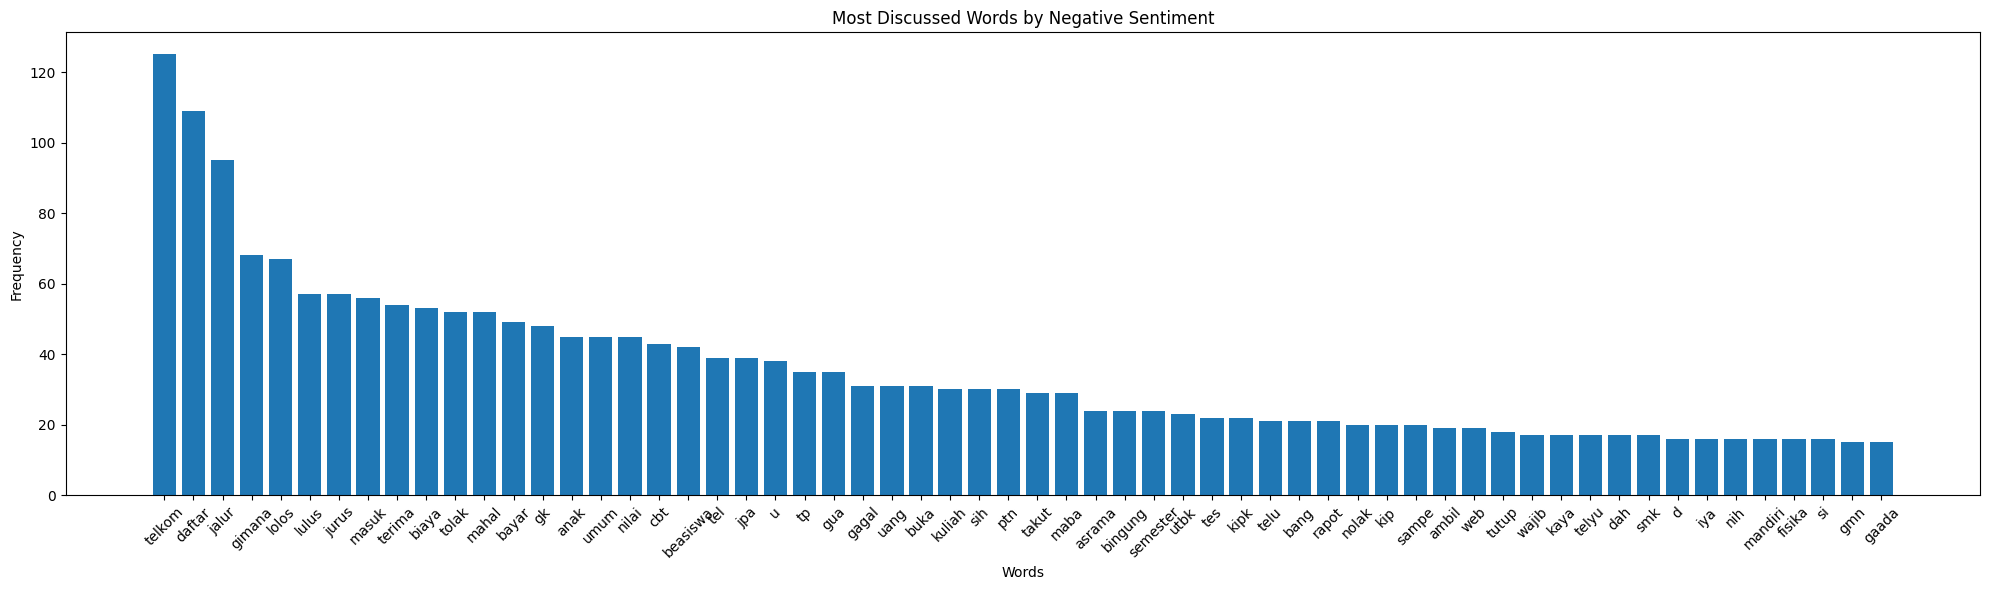

In [ ]:
import concurrent.futures
from collections import Counter
import matplotlib.pyplot as plt

# Function to stem text and create a Counter
def stem_text_counter(text):
    # Replace this with your actual stemming logic using Sastrawi or any other library
    stemmed_words = text.split()  # Split text into words for illustration
    return Counter(stemmed_words)

def process_chunk(chunk):
    counters = [stem_text_counter(text) for text in chunk]
    total_counter = Counter()
    for counter in counters:
        total_counter.update(counter)
    return total_counter

# Apply the function to the DataFrame column
negative_df = df_result_tweet[df_result_tweet['sentiment_class'] == 'negative']
cleaned_texts = negative_df['cleaned_text']

# Split the cleaned texts into chunks
chunk_size = len(cleaned_texts) // 4  # You can adjust the number of chunks as needed
chunks = [cleaned_texts[i:i+chunk_size] for i in range(0, len(cleaned_texts), chunk_size)]

# Process chunks in parallel
with concurrent.futures.ProcessPoolExecutor() as executor:
    chunk_counters = list(executor.map(process_chunk, chunks))

# Combine chunk counters
total_counter = Counter()
for counter in chunk_counters:
    total_counter.update(counter)

# Get the most common words and their counts
most_common_words = total_counter.most_common(60)  # Customize the number of words to show

# Extract words and their counts for plotting
words, counts = zip(*most_common_words)

# Create a DataFrame from the extracted words and counts
word_count_df_negative = pd.DataFrame({'Word': words, 'Count': counts, 'sentiment_class': 'negative'})

# Create a bar chart
plt.figure(figsize=(20, 6))
plt.bar(words, counts)
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Most Discussed Words by Negative Sentiment')
plt.xticks(rotation=45)
plt.tight_layout()

# Display the bar chart
plt.show()


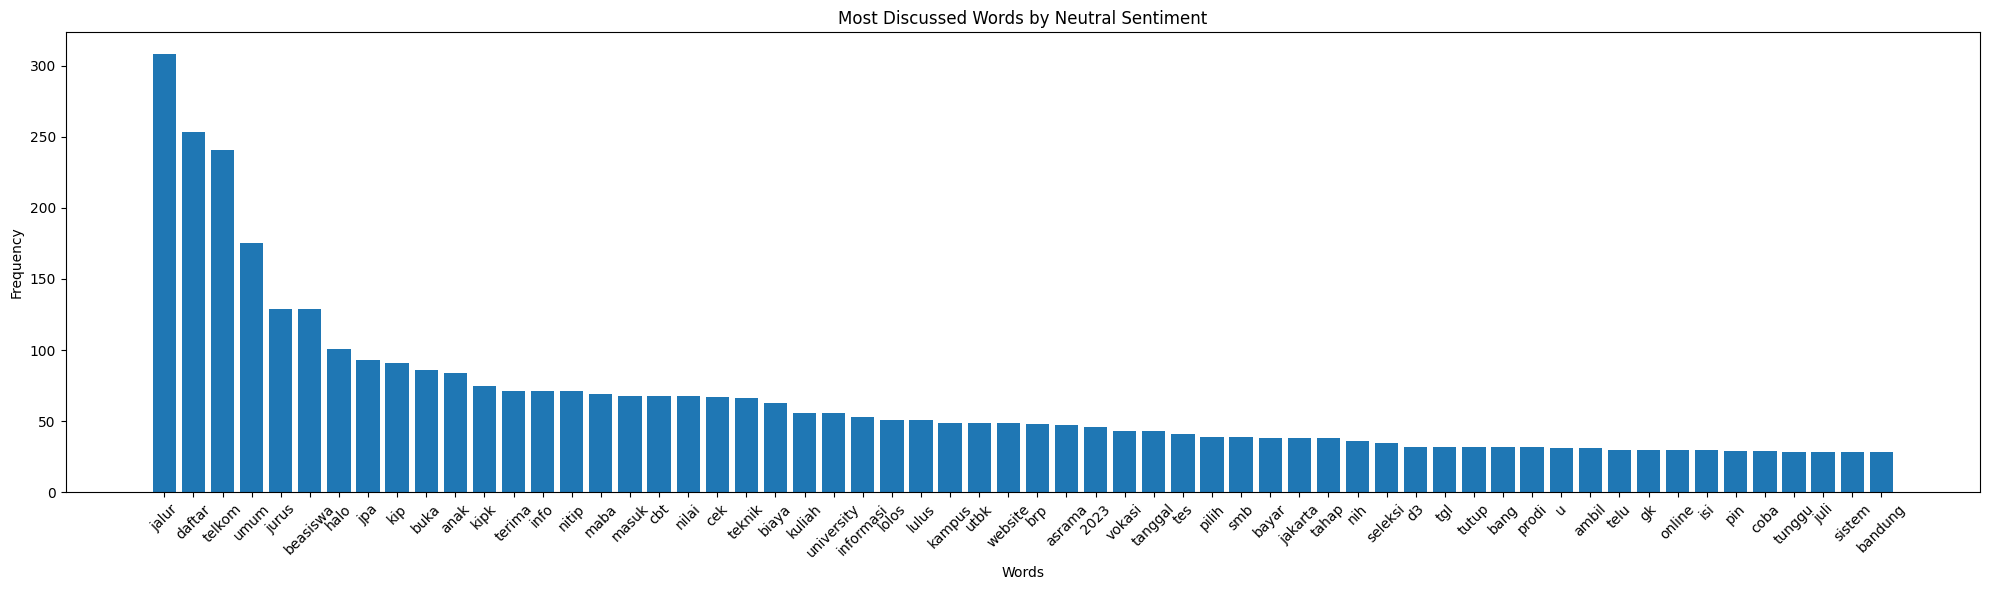

In [ ]:
# Apply the function to the DataFrame column
neutral_df = df_result_tweet[df_result_tweet['sentiment_class'] == 'neutral']
cleaned_texts = neutral_df['cleaned_text']

# Split the cleaned texts into chunks
chunk_size = len(cleaned_texts) // 4  # You can adjust the number of chunks as needed
chunks = [cleaned_texts[i:i+chunk_size] for i in range(0, len(cleaned_texts), chunk_size)]

# Process chunks in parallel
with concurrent.futures.ProcessPoolExecutor() as executor:
    chunk_counters = list(executor.map(process_chunk, chunks))

# Combine chunk counters
total_counter = Counter()
for counter in chunk_counters:
    total_counter.update(counter)

# Get the most common words and their counts
most_common_words = total_counter.most_common(60)  # Customize the number of words to show

# Extract words and their counts for plotting
words, counts = zip(*most_common_words)

# Create a DataFrame from the extracted words and counts
word_count_df_neutral = pd.DataFrame({'Word': words, 'Count': counts, 'sentiment_class': 'neutral'})

# Create a bar chart
plt.figure(figsize=(20, 6))
plt.bar(words, counts)
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Most Discussed Words by Neutral Sentiment')
plt.xticks(rotation=45)
plt.tight_layout()

# Display the bar chart
plt.show()


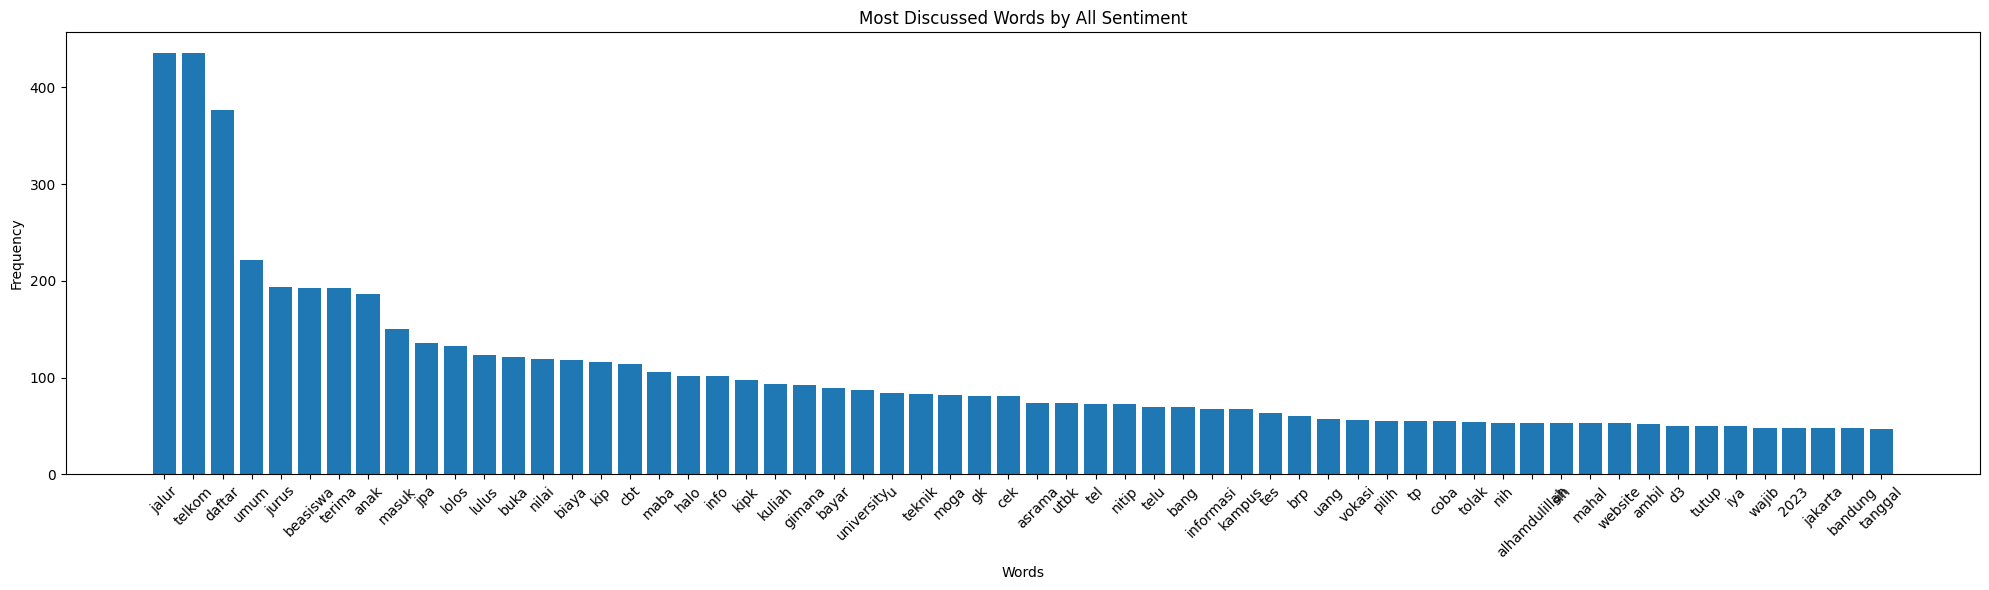

In [ ]:
# Apply the function to the DataFrame column
cleaned_texts = df_result_tweet['cleaned_text']

# Split the cleaned texts into chunks
chunk_size = len(cleaned_texts) // 4  # You can adjust the number of chunks as needed
chunks = [cleaned_texts[i:i+chunk_size] for i in range(0, len(cleaned_texts), chunk_size)]

# Process chunks in parallel
with concurrent.futures.ProcessPoolExecutor() as executor:
    chunk_counters = list(executor.map(process_chunk, chunks))

# Combine chunk counters
total_counter = Counter()
for counter in chunk_counters:
    total_counter.update(counter)

# Get the most common words and their counts
most_common_words = total_counter.most_common(60)  # Customize the number of words to show

# Extract words and their counts for plotting
words, counts = zip(*most_common_words)

# Create a DataFrame from the extracted words and counts
word_count_df_all = pd.DataFrame({'Word': words, 'Count': counts})

# Create a bar chart
plt.figure(figsize=(20, 6))
plt.bar(words, counts)
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Most Discussed Words by All Sentiment')
plt.xticks(rotation=45)
plt.tight_layout()

# Display the bar chart
plt.show()


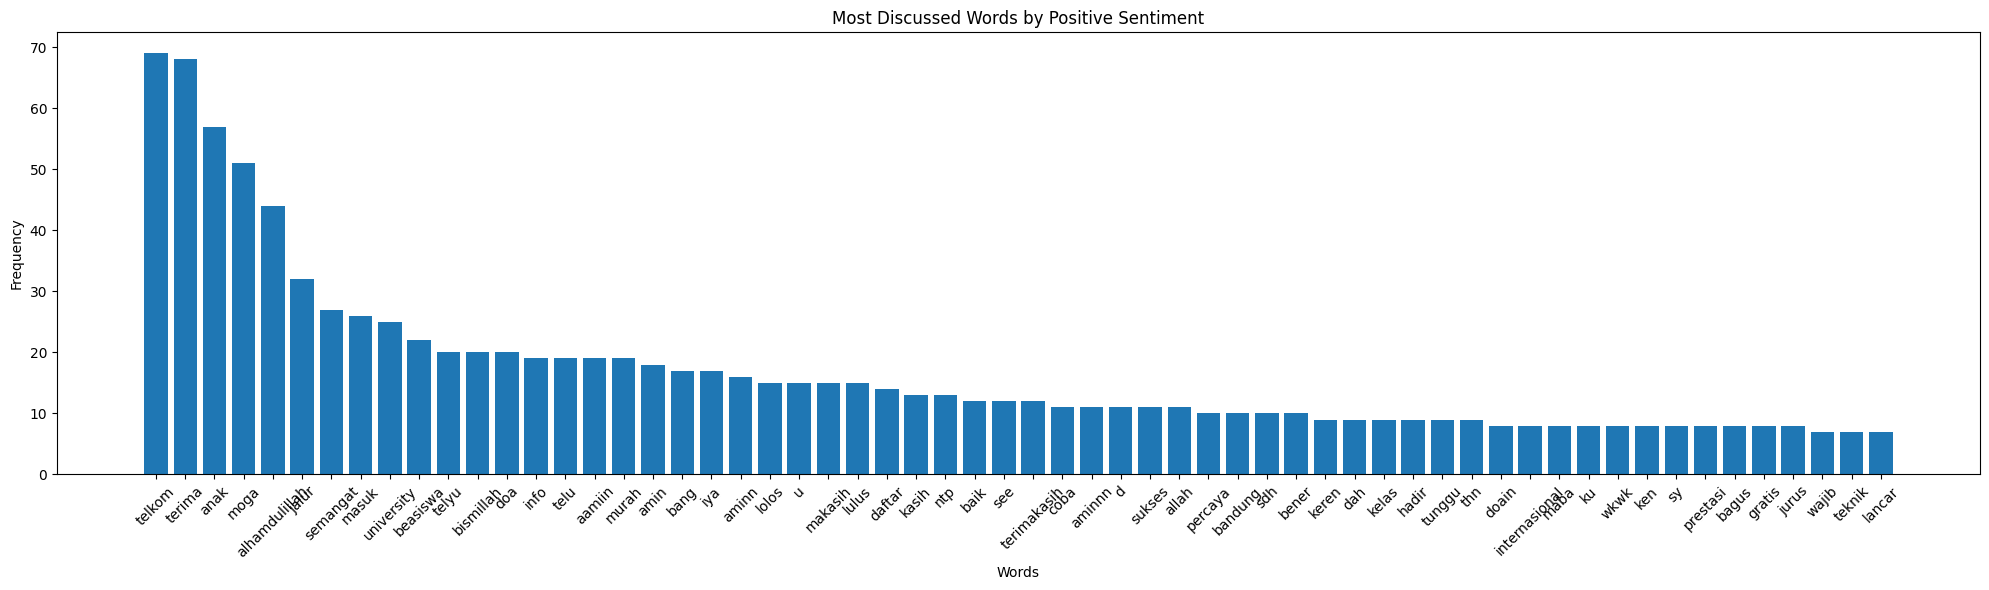

In [ ]:
# Apply the function to the DataFrame column
positive_df = df_result_tweet[df_result_tweet['sentiment_class'] == 'positive']
cleaned_texts = positive_df['cleaned_text']

# Split the cleaned texts into chunks
chunk_size = len(cleaned_texts) // 4  # You can adjust the number of chunks as needed
chunks = [cleaned_texts[i:i+chunk_size] for i in range(0, len(cleaned_texts), chunk_size)]

# Process chunks in parallel
with concurrent.futures.ProcessPoolExecutor() as executor:
    chunk_counters = list(executor.map(process_chunk, chunks))

# Combine chunk counters
total_counter = Counter()
for counter in chunk_counters:
    total_counter.update(counter)

# Get the most common words and their counts
most_common_words = total_counter.most_common(60)  # Customize the number of words to show

# Extract words and their counts for plotting
words, counts = zip(*most_common_words)

# Create a DataFrame from the extracted words and counts
word_count_df_positive = pd.DataFrame({'Word': words, 'Count': counts, 'sentiment_class': 'positive'})

# Create a bar chart
plt.figure(figsize=(20, 6))
plt.bar(words, counts)
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Most Discussed Words by Positive Sentiment')
plt.xticks(rotation=45)
plt.tight_layout()

# Display the bar chart
plt.show()

In [ ]:
# Replace 'your_host', 'your_username', 'your_password', 'your_database', and 'your_table_name' with appropriate values
host = 'db4free.net'
username = 'smbtelkom'
password = 'smbtelkom'
database = 'smbtelkom'
table_name = 'words'

word_count_df = pd.concat([word_count_df_positive, word_count_df_negative, word_count_df_neutral], axis=0)

try:
    # Connect to MySQL
    connection = connect_mysql(host, username, password, database)

    # Save DataFrame to MySQL
    post_data_mysql(word_count_df, connection, table_name)

except Exception as e:
    print(e)

finally:
    # Close the connection after saving (if it is not already closed)
    if connection is not None and connection.is_connected():
      connection.close()

Connected to MySQL database successfully.
 Connected to MySQL database successfully. 

DataFrame has been successfully saved to MySQL.
 DataFrame has been successfully saved to MySQL. 

